# Microbusiness Density Forecasting

**Importing Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import lightgbm as lgb


In [50]:
train_df = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv")
test_df = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv")
census_df = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv")
df_sub = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv")

In [6]:
train_df.head()

row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1  1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2  1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3  1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4  1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   

   microbusiness_density  active  
0               3.007682    1249  
1               2.884870    1198  
2               3.055843    1269  
3               2.993233    1243  
4               2.993233    1243

In [7]:
test_df.head()

row_id  cfips first_day_of_month
0  1001_2022-11-01   1001         2022-11-01
1  1003_2022-11-01   1003         2022-11-01
2  1005_2022-11-01   1005         2022-11-01
3  1007_2022-11-01   1007         2022-11-01
4  1009_2022-11-01   1009         2022-11-01

In [20]:
census_df.head()

pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  pct_bb_2021  cfips  \
0         76.6         78.9         80.6         82.7         85.5   1001   
1         74.5         78.1         81.8         85.1         87.9   1003   
2         57.2         60.4         60.5         64.6         64.6   1005   
3         62.0         66.1         69.2         76.1         74.6   1007   
4         65.8         68.5         73.0         79.6         81.0   1009   

   pct_college_2017  pct_college_2018  pct_college_2019  pct_college_2020  \
0              14.5              15.9              16.1              16.7   
1              20.4              20.7              21.0              20.2   
2               7.6               7.8               7.6               7.3   
3               8.1               7.6               6.5               7.4   
4               8.7               8.1               8.6               8.9   

   ...  pct_it_workers_2017  pct_it_workers_2018  pct_it_workers_2019  \
0  ...                  1.3                  1.1                  0.7   
1  ...                  1.4                  1.3                  1.4   
2  ...                  0.5                  0.3                  0.8   
3  ...                  1.2                  1.4                  1.6   
4  ...                  1.3                  1.4                  0.9   

   pct_it_workers_2020  pct_it_workers_2021  median_hh_inc_2017  \
0                  0.6                  1.1               55317   
1                  1.0                  1.3               52562   
2                  1.1                  0.8               33368   
3                  1.7                  2.1               43404   
4                  1.1                  0.9               47412   

   median_hh_inc_2018  median_hh_inc_2019  median_hh_inc_2020  \
0             58786.0               58731             57982.0   
1             55962.0               58320             61756.0   
2             34186.0               32525             34990.0   
3             45340.0               47542             51721.0   
4             48695.0               49358             48922.0   

   median_hh_inc_2021  
0             62660.0  
1             64346.0  
2             36422.0  
3             54277.0  
4             52830.0  

[5 rows x 26 columns]

In [6]:
df_sample.head()

row_id  microbusiness_density
0  1001_2022-11-01               3.817671
1  1003_2022-11-01               3.817671
2  1005_2022-11-01               3.817671
3  1007_2022-11-01               3.817671
4  1009_2022-11-01               3.817671

In [7]:
#Checking for missing values 
train_df.isna().sum()

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [8]:
train_df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
train_df['first_day_of_month'] = pd.to_datetime(train_df.first_day_of_month)

In [10]:
from plotly.subplots import make_subplots

<AxesSubplot:>

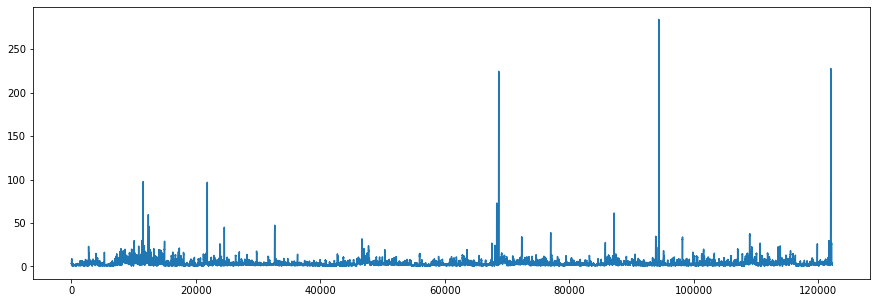

In [22]:
plt.figure(figsize = (15,5))
train_df['microbusiness_density'].plot()

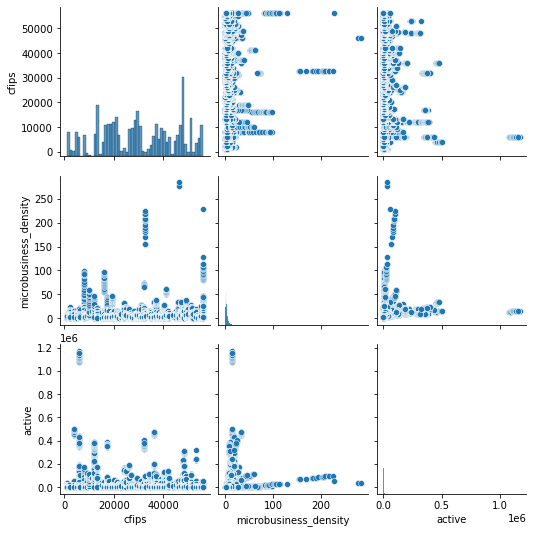

In [12]:
sns.pairplot(train_df)

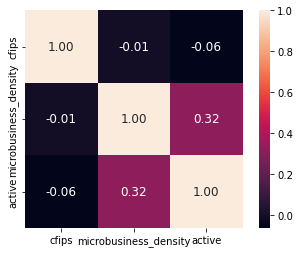

In [13]:
corrmat = train_df.corr()
hm = sns.heatmap(corrmat, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 12})

In [17]:
from pandas_profiling import ProfileReport
report = ProfileReport(train_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
!pip install plotly-geo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.1 MB/s eta 0:00:0000:0100:01


In [21]:
fig = px.choropleth(train_df.cfips, title = "Density",color = census_df.pct_bb_2019.values)
fig.layout.template = None
fig.show()

In [70]:
state_dict = train_df[['cfips', 'state', 'county']]
state_dict = state_dict.set_index('cfips')
state_dict = state_dict.drop_duplicates()
state_dict = state_dict.to_dict()

test_df['state'] = test_df['cfips'].map(state_dict['state'])
test_df['county'] = test_df['cfips'].map(state_dict['county'])

**Time Features**

In [71]:
df_all = pd.concat([train_df, test_df], axis = 0)

dateCol = 'first_day_of_month'
df_all[dateCol] = pd.to_datetime(df_all[dateCol])

df_all['year'] = df_all[dateCol].dt.year
df_all['month'] = df_all[dateCol].dt.month
df_all['scale'] = (df_all[dateCol] - df_all[dateCol].min()).dt.days
df_all['scale'] = df_all['scale'].factorize()[0]

**Lag Features**

In [72]:
lags = [1,2,3,4,5,6,7,8,9,10]
target = 'microbusiness_density'

for lag in lags:
    df_all[f"lag({lag})"] = df_all.groupby('cfips')[target].shift(lag)
    
df_all['active'] = df_all.groupby('cfips')['active'].shift(10)

In [89]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 147345 entries, 21017.0 to nan
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   index                  147345 non-null  int64   
 1   county                 147345 non-null  category
 2   state                  147345 non-null  category
 3   microbusiness_density  122265 non-null  float64 
 4   active                 115995 non-null  float64 
 5   year                   147345 non-null  int64   
 6   month                  147345 non-null  int64   
 7   scale                  147345 non-null  int64   
 8   lag(1)                 122265 non-null  float64 
 9   lag(2)                 122265 non-null  float64 
 10  lag(3)                 122265 non-null  float64 
 11  lag(4)                 122265 non-null  float64 
 12  lag(5)                 122265 non-null  float64 
 13  lag(6)                 122265 non-null  float64 
 14  lag(7)         

**Categorical Features**

In [74]:
df_all = df_all.drop(columns = [dateCol])

catCols = ['county', 'state']
df_all[catCols] = df_all[catCols].astype("category")

In [85]:

df_all[census_df.columns] = census_df
df_all.drop("row_id", axis = 'columns', inplace = True)

In [88]:
df_all.set_index('cfips', inplace = True)

In [99]:
fig = px.choropleth(df_all,
                    locations='state',
                    color='microbusiness_density',
                    locationmode='USA-states', 
                    scope='usa')
fig.show()

**Hyperparameter optimization**

In [41]:
import optuna 

[I 2023-03-07 23:24:40,869] A new study created in memory with name: Regressor


  0%|          | 0/30 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_iter` in params. Will use it instead of argument



[LightGBM] [Warning] lambda_l1 is set=5.600541503180177, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.600541503180177
[LightGBM] [Warning] lambda_l2 is set=8.754888990392873, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754888990392873
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] num_iterations is set=200, n_iter=200 will be ignored. Current value: num_iterations=200
[I 2023-03-07 23:24:43,987] Trial 0 finished with value: 1.070528946051224 and parameters: {'colsample_bytree': 0.8471983564325131, 'colsample_bynode': 0.9987044179553733, 'max_depth': 10, 'learning_rate': 0.022592308863186458, 'lambda_l1': 5.600541503180177, 'lambda_l2': 8.754888990392873, 'num_leaves': 944, 'min_data_in_leaf': 18}. Best is trial 0 with value: 1.070528946051224.
[LightGBM] [Warning] lambda_l1 is set=9.09095314573557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.09095314

In [42]:
study.best_value

1.068296876713875

In [43]:
study.best_params

{'colsample_bytree': 0.9959448399792232,
 'colsample_bynode': 0.9758173338953686,
 'max_depth': 8,
 'learning_rate': 0.02286001351820894,
 'lambda_l1': 7.030599412625583,
 'lambda_l2': 9.179900167650256,
 'num_leaves': 74,
 'min_data_in_leaf': 99}

**Prediction**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import IPython

In [93]:
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
train["first_day_of_month"] = pd.to_datetime(train["first_day_of_month"])
train = train.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
test["first_day_of_month"] = pd.to_datetime(test["first_day_of_month"])
test = test.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

In [94]:
ID = train.cfips.unique()
train_x = np.arange(39).reshape(-1,1)
test_x = np.arange(39,47).reshape(-1,1)

pre = np.zeros((len(ID),8))

In [95]:
TRAIN_SZ = len(train)//3135
TEST_SZ = len(test)//3135

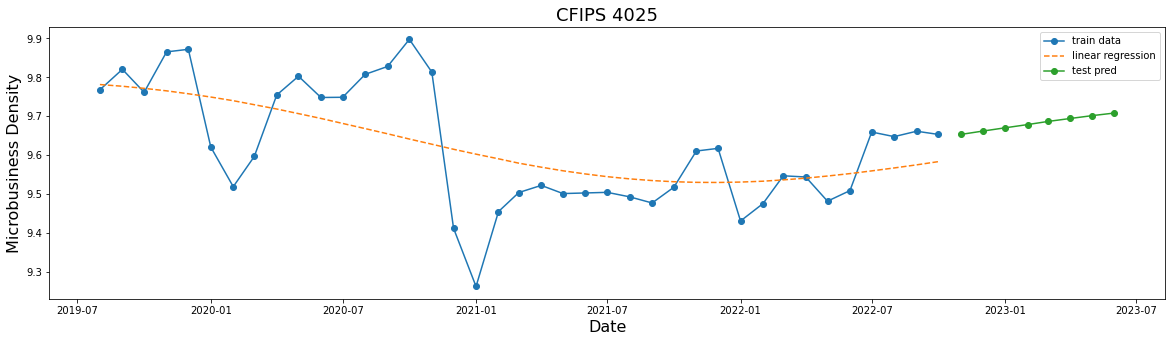

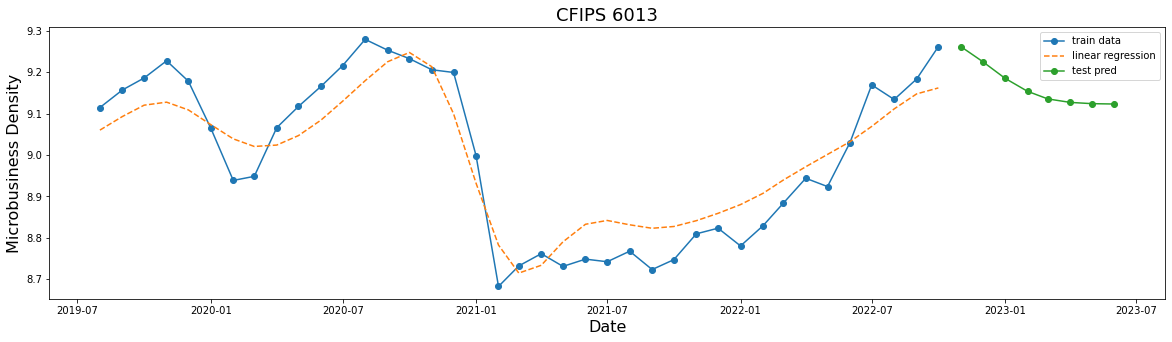

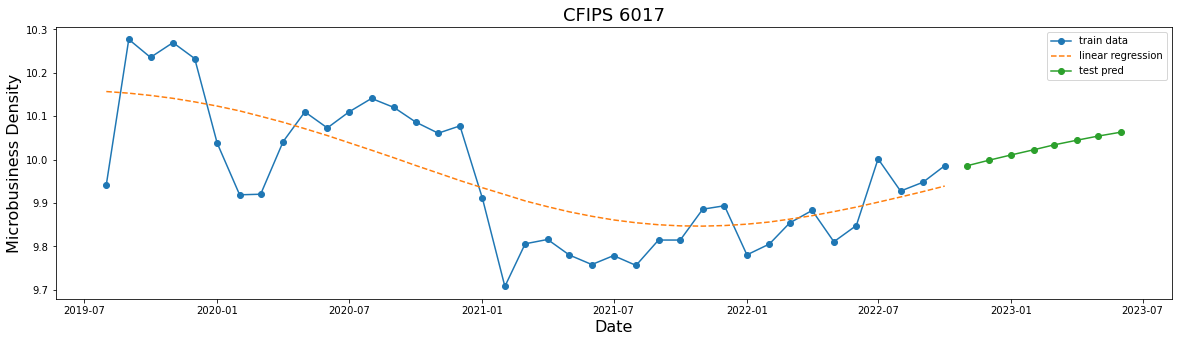

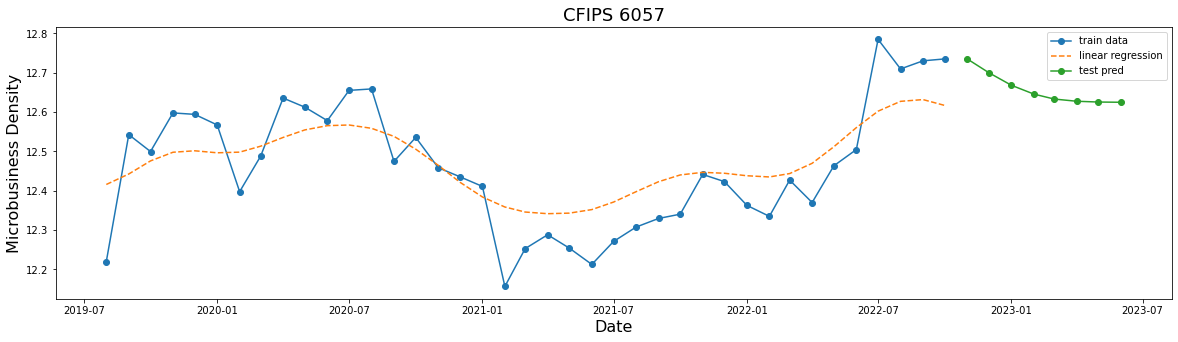

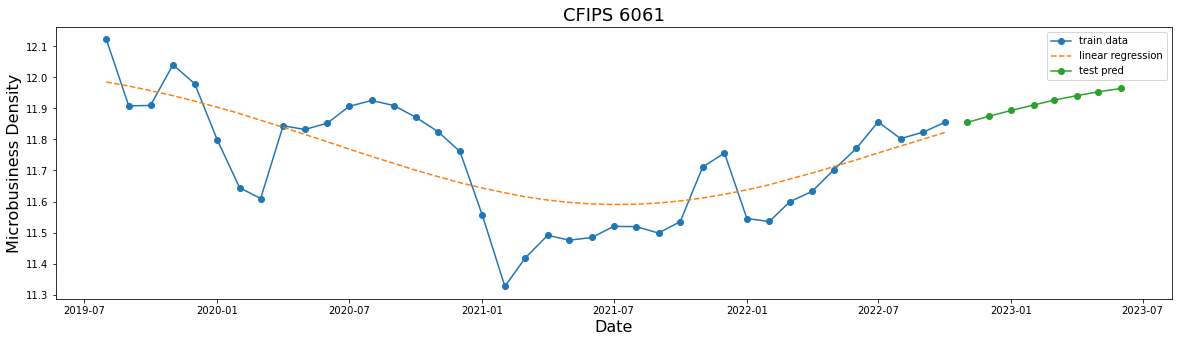

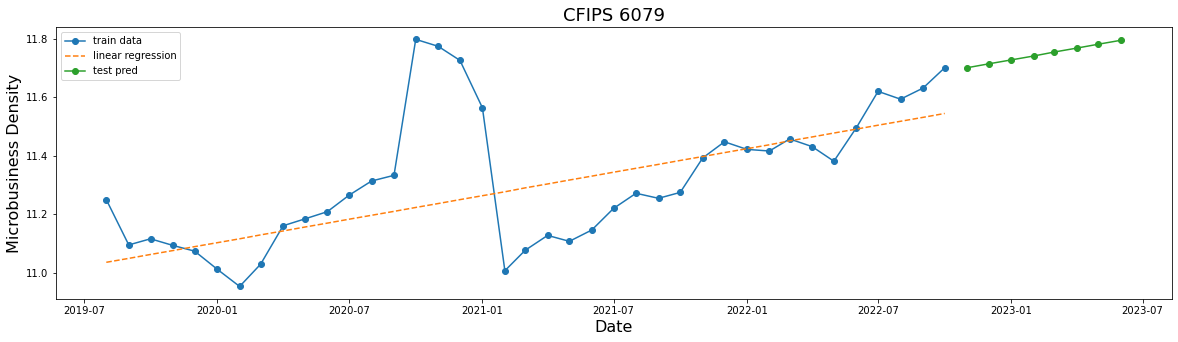

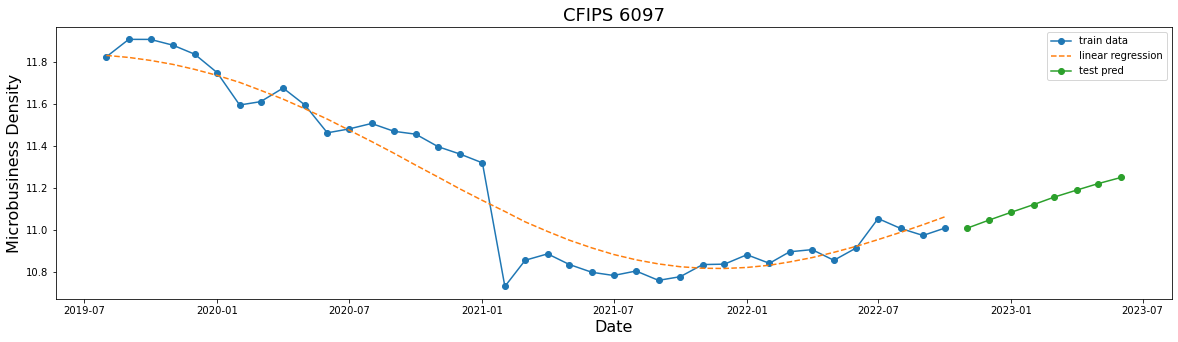

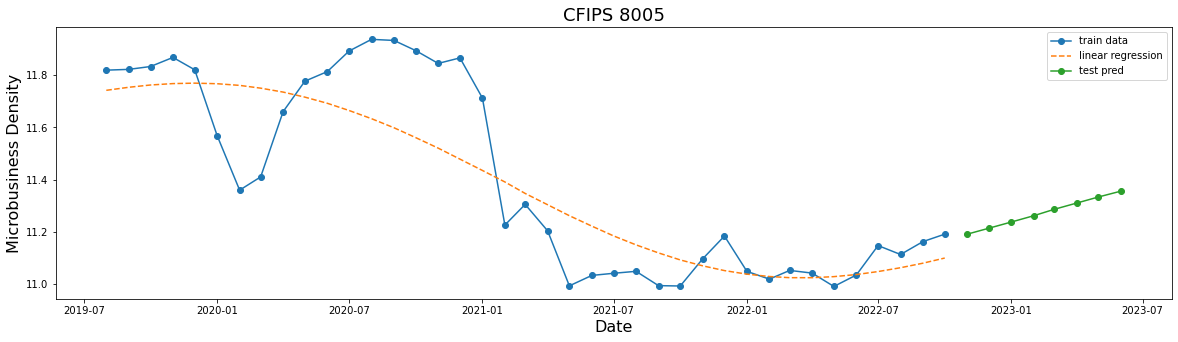

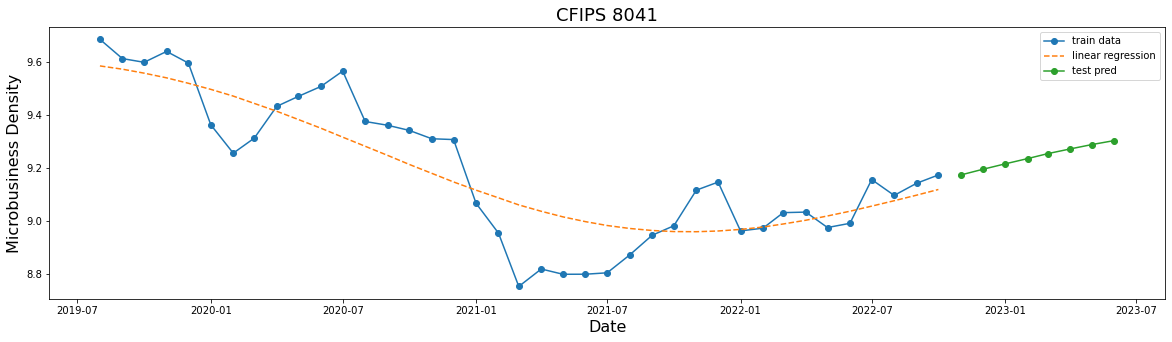

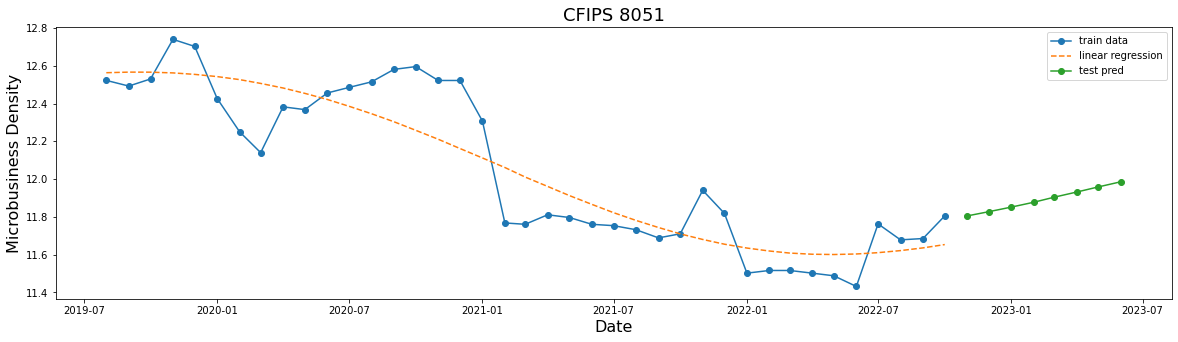

99.96810207336523%%
 k:  104 k2: 164


In [96]:
k = 0 
k2 = 0
density_threshold =8
for n,ids in enumerate(ID):
    
    print(f'{n/len(ID)*100}%',end='\r')

    df = train.loc[train.cfips==ids]
    last = df.microbusiness_density.values[-1]
    # last_preds[i,] = [last]*TEST_SZ
    
    
# part 1
    if df.microbusiness_density.mean()< density_threshold :
        pre[n,] = last
        continue

        
# part 2 : seasonal model
    # COMPUTE SEASONAL TRENDS
    WIDTH1 = 5; WIDTH2 = 7; WIDTH3 = 7
    # RECENT
    x0a = df.microbusiness_density.values[-1-WIDTH1:-1]
    x0 = np.median(x0a)
    # ONE YEAR AGO
    x1 = df.microbusiness_density.values[-12-1+1]
    x2a = df.microbusiness_density.values[-12-1-WIDTH2+1:-12-1+1]
    x2 = np.median(x2a)
    # TWO YEARS AGO
    x3 = df.microbusiness_density.values[-24-1+1]
    x4a = df.microbusiness_density.values[-24-1-WIDTH3+1:-24-1+1]
    x4 = np.median(x4a)

    # FIT TRANSFORM SEASONAL MODEL
    p = last
    
    if (x1>x2)&(x3>x4)&(last>x0): # p *= 1.005
        sea_rec = n
        p = [p*1.005**(i+1) for i in range(8)]
    elif (x1<x2)&(x3<x4)&(last<x0): # p *= 0.995
        p = [p*0.995**(i+1) for i in range(8)]
    # seasonal_preds[i,] = [p]*TEST_SZ
    
    
#part 3: SVM
    #  compute svm
    parameters = {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 0.5,0.9,1,2,5],
        'gamma': [0.0005,0.001,0.002,0.1,1]
    }
    svm_model = GridSearchCV(SVR(), param_grid=parameters, cv=3, scoring='neg_mean_squared_error')
    svm_model.fit(train_x,df.microbusiness_density)
    if abs(svm_model.best_score_) < 0.06:
        if k < 10:
            tmp = svm_model.predict(test_x)
            gap = df.microbusiness_density.values[-1]-tmp[0] 
            tmp = tmp + gap
            pre[n,] = tmp
            plt.figure(figsize=(20,5))
            plt.plot(df.first_day_of_month,df.microbusiness_density,'-o',label='train data')
            plt.plot(df.first_day_of_month,svm_model.predict(train_x),'--',label='linear regression')
            plt.plot(test.first_day_of_month.values[:8],pre[n,],'-o',label='test pred')
            plt.title(f'CFIPS {ids}',size=18)
            plt.xlabel('Date',size=16)
            plt.ylabel('Microbusiness Density',size=16)
            plt.legend()
            plt.show()
        k = k + 1
    else:
        pre[n,] = p
        k2 = k2 +1
        # IPython.display.clear_output()
        
print('\n k: ',k,'k2:',k2)

In [97]:
test['microbusiness_density'] = pre.reshape((-1))
sub = test[['row_id','microbusiness_density']]
sub.to_csv('sunbmission.csv',index=False)
print( sub.shape )
sub.head()

(25080, 2)


row_id  microbusiness_density
0  1001_2022-11-01               3.463856
1  1001_2022-12-01               3.463856
2  1001_2023-01-01               3.463856
3  1001_2023-02-01               3.463856
4  1001_2023-03-01               3.463856


Learn from: 
- https://www.kaggle.com/code/cdeotte/seasonal-model-with-validation-lb-1-091
- https://www.kaggle.com/code/greysky/lightgbm-starter-with-us-map-lb-1-0871
- https://www.kaggle.com/code/jackwen6/svm-prediction
- https://www.kaggle.com/code/michaelbryantds/godaddy-eda
- https://www.kaggle.com/code/batprem/knn-impute-voting-xgb-lgbm-cat
- https://www.kaggle.com/code/imnaho/eda-predict